In [262]:
import pandas as pd 
import seaborn as sns


In [263]:
d1=pd.read_csv("pdata\hw2.1.csv",sep=";",index_col="id")
d2=pd.read_csv("pdata\hw2.2.csv",sep=";",index_col="id")

In [264]:
d1.head(5)

,gender,status,employed,income,extraIncome,expenses,buy
id,,,,,,,
LP001002,Male,No,No,5849.0,0.0,NaN,Y
LP001003,Male,NaN,No,4583.0,1508.0,1111.0,N
LP001004,Male,Yes,Yes,3000.0,0.0,66.0,Y
LP001005,Male,Yes,No,2583.0,2358.0,120.0,Y
LP001006,Male,No,No,NaN,0.0,141.0,Y


In [265]:
pd.value_counts(d1["gender"])

Male    30
Name: gender, dtype: int64

In [266]:
d2.head(5)


,gender,status,employed,income,extraIncome,expenses,buy
id,,,,,,,
LP0010050,Male,No,No,43534.0,0.0,NaN,Y
LP0010051,Male,NaN,No,4583.0,1508.0,1111.0,N
LP0010052,Male,Yes,Yes,43534.0,0.0,5345.0,Y
LP0010053,Male,Yes,No,2583.0,2358.0,120.0,Y
LP0010054,Male,No,No,NaN,0.0,141.0,Y


In [267]:
pd.value_counts(d2["gender"])

Male    20
Name: gender, dtype: int64

In [268]:
d2.size

140

In [269]:
d1.size

210

In [270]:
df=pd.concat([d1,d2])
print(df.size,"\n",df.shape)

350 
 (50, 7)


In [271]:
d2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20 entries, LP0010050 to LP0010069
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   gender       20 non-null     object 
 1   status       16 non-null     object 
 2   employed     19 non-null     object 
 3   income       18 non-null     float64
 4   extraIncome  18 non-null     float64
 5   expenses     17 non-null     float64
 6   buy          18 non-null     object 
dtypes: float64(3), object(4)
memory usage: 1.2+ KB


In [272]:
df.describe().head()

,income,extraIncome,expenses
count,43.000000,44.000000,44.000000
mean,17550.837209,8754.295455,3072.340909
std,49956.890344,18734.728869,10040.625006
min,564.000000,0.000000,66.000000
25%,3000.000000,700.000000,113.250000


In [273]:
df.select_dtypes("object").head()#****************************

,gender,status,employed,buy
id,,,,
LP001002,Male,No,No,Y
LP001003,Male,NaN,No,N
LP001004,Male,Yes,Yes,Y
LP001005,Male,Yes,No,Y
LP001006,Male,No,No,Y


In [274]:
df.select_dtypes("object").describe()


,gender,status,employed,buy
count,50,40,46,46
unique,1,2,2,2
top,Male,Yes,No,Y
freq,50,30,35,31


In [275]:
df.isnull().sum()

gender          0
status         10
employed        4
income          7
extraIncome     6
expenses        6
buy             4
dtype: int64

In [276]:
df.duplicated().sum()


11

In [277]:
df.drop_duplicates(inplace=True) 
df.shape,df.size

((39, 7), 273)

In [278]:
df["income"].unique()

array([  5849.,   4583.,   3000.,   2583.,     nan,   5417.,   2333.,
         3036.,   4006.,   3200.,   2500.,   3073.,  45343.,   4444.,
        56334.,    564.,  34332.,  43534., 324324.,   3434.,  12841.,
         5676.,  21212.,  23243.,   6556.,   2232.,  32232.])

In [279]:
df["status"]=df["status"].fillna("yes")

In [280]:
df["income"]=df["income"].fillna(df["income"].mean())

In [281]:
pd.value_counts(df["employed"])

No     26
Yes    10
Name: employed, dtype: int64

In [282]:
df["employed"]=df["employed"].fillna("Yes")

In [283]:
df=df.dropna()
df.size

210

In [284]:
df.isnull().sum()

gender         0
status         0
employed       0
income         0
extraIncome    0
expenses       0
buy            0
dtype: int64

In [285]:
df.head()

,gender,status,employed,income,extraIncome,expenses,buy
id,,,,,,,
LP001003,Male,yes,No,4583.000000,1508.0,1111.0,N
LP001004,Male,Yes,Yes,3000.000000,0.0,66.0,Y
LP001005,Male,Yes,No,2583.000000,2358.0,120.0,Y
LP001006,Male,No,No,20326.888889,0.0,141.0,Y
LP001007,Male,Yes,Yes,5417.000000,4196.0,267.0,Y


In [286]:
x=df.iloc[[5,8,15],0:4]
x

,gender,status,employed,income
id,,,,
LP001010,Male,Yes,No,4006.0
LP001013,Male,yes,Yes,2500.0
LP001027,Male,yes,Yes,564.0


In [287]:
df["total_income"]=df["income"]+df["extraIncome"]
df.head()


,gender,status,employed,income,extraIncome,expenses,buy,total_income
id,,,,,,,,
LP001003,Male,yes,No,4583.000000,1508.0,1111.0,N,6091.000000
LP001004,Male,Yes,Yes,3000.000000,0.0,66.0,Y,3000.000000
LP001005,Male,Yes,No,2583.000000,2358.0,120.0,Y,4941.000000
LP001006,Male,No,No,20326.888889,0.0,141.0,Y,20326.888889
LP001007,Male,Yes,Yes,5417.000000,4196.0,267.0,Y,9613.000000


In [288]:
df[(df["status"] == "yes") & (df["employed"] == "Yes")]


,gender,status,employed,income,extraIncome,expenses,buy,total_income
id,,,,,,,,
LP001013,Male,yes,Yes,2500.0,1840.0,109.0,Y,4340.0
LP001027,Male,yes,Yes,564.0,6792.0,109.0,Y,7356.0


In [289]:
df= df.sort_values(by="total_income",ascending=False)
df.head()

,gender,status,employed,income,extraIncome,expenses,buy,total_income
id,,,,,,,,
LP001017,Male,yes,No,4583.0,99905.0,128.0,N,104488.0
LP001020,Male,Yes,No,34332.0,56543.0,141.0,N,90875.0
LP001025,Male,Yes,Yes,56334.0,3467.0,349.0,N,59801.0
LP0010068,Male,Yes,No,2232.0,56543.0,141.0,N,58775.0
LP001021,Male,No,Yes,45343.0,4196.0,267.0,Y,49539.0


In [290]:
corr=df.corr()#***********************
corr

,income,extraIncome,expenses,total_income
income,1.000000,-0.015509,-0.105822,0.567633
extraIncome,-0.015509,1.000000,-0.091138,0.814379
expenses,-0.105822,-0.091138,1.000000,-0.136460
total_income,0.567633,0.814379,-0.136460,1.000000


<AxesSubplot:>

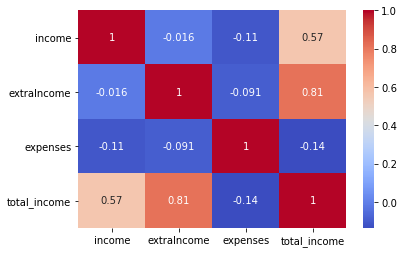

In [298]:
import seaborn as sns 
sns.heatmap(corr,annot=True,cmap="coolwarm")

In [299]:
df.skew()
#****************

income          1.563683
extraIncome     3.213918
expenses        3.973562
total_income    1.783664
dtype: float64

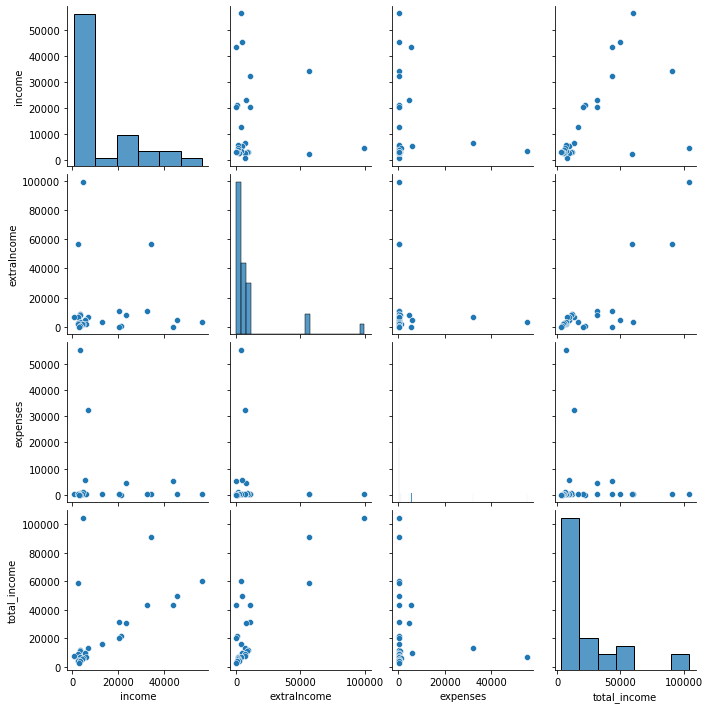

In [300]:
sns.pairplot(df)

<AxesSubplot:>

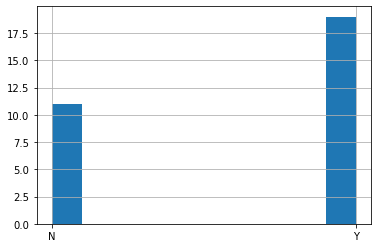

In [301]:
df["buy"].hist()

In [302]:
df.head()

,gender,status,employed,income,extraIncome,expenses,buy,total_income
id,,,,,,,,
LP001017,Male,yes,No,4583.0,99905.0,128.0,N,104488.0
LP001020,Male,Yes,No,34332.0,56543.0,141.0,N,90875.0
LP001025,Male,Yes,Yes,56334.0,3467.0,349.0,N,59801.0
LP0010068,Male,Yes,No,2232.0,56543.0,141.0,N,58775.0
LP001021,Male,No,Yes,45343.0,4196.0,267.0,Y,49539.0


<AxesSubplot:xlabel='id'>

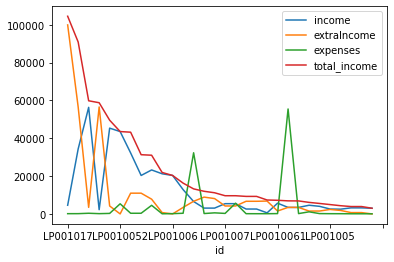

In [303]:
df.plot()

<AxesSubplot:>

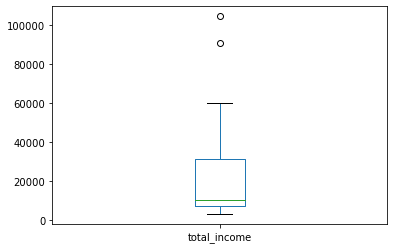

In [304]:
df["total_income"].plot(kind="box")

In [305]:
q1=df["income"].quantile(0.25)
q3=df["income"].quantile(0.75)
iqr=q3-q1
upper=q3+1.5*iqr
lower=q1-1.5*iqr
print(lower,upper)

-22807.833333333336 46207.722222222226


In [306]:
df[~df["income"].between(lower,upper)]# all the outliers

,gender,status,employed,income,extraIncome,expenses,buy,total_income
id,,,,,,,,
LP001025,Male,Yes,Yes,56334.0,3467.0,349.0,N,59801.0


<AxesSubplot:xlabel='employed,buy'>

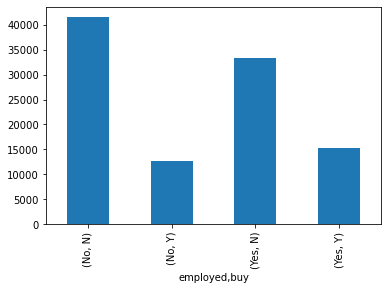

In [307]:
x=df.groupby(["employed","buy"]).mean()["total_income"]
x.plot(kind="bar")#the total income for not employed and didnt buy is the highest

In [308]:
df.head()

,gender,status,employed,income,extraIncome,expenses,buy,total_income
id,,,,,,,,
LP001017,Male,yes,No,4583.0,99905.0,128.0,N,104488.0
LP001020,Male,Yes,No,34332.0,56543.0,141.0,N,90875.0
LP001025,Male,Yes,Yes,56334.0,3467.0,349.0,N,59801.0
LP0010068,Male,Yes,No,2232.0,56543.0,141.0,N,58775.0
LP001021,Male,No,Yes,45343.0,4196.0,267.0,Y,49539.0


# unbalanced data

In [309]:
pd.value_counts(df["employed"])

No     19
Yes    11
Name: employed, dtype: int64

In [310]:
from sklearn.utils import resample 
upsampled_df =resample(df[df.employed=="Yes"],n_samples=len(df[df.employed=="No"]),replace=True,random_state=52)
upsampled_df.shape

(19, 8)

In [311]:
x=df[df["employed"]=="No"]
df=pd.concat([x,upsampled_df])
pd.value_counts(df["employed"])

No     19
Yes    19
Name: employed, dtype: int64

# PCA/binning / encoding / 

In [312]:
 #binning 
import pandas as pd

# Define the income categories and corresponding bin boundaries
income_bins = [0, 30000, 60000, float('inf')]
income_labels = ['low', 'mid', 'high']

# Apply the categorization to the 'income' column
df['income_category'] = pd.cut(df['total_income'], bins=income_bins, labels=income_labels)
df.head()

,gender,status,employed,income,extraIncome,expenses,buy,total_income,income_category
id,,,,,,,,,
LP001017,Male,yes,No,4583.000000,99905.0,128.0,N,104488.000000,high
LP001020,Male,Yes,No,34332.000000,56543.0,141.0,N,90875.000000,high
LP0010068,Male,Yes,No,2232.000000,56543.0,141.0,N,58775.000000,mid
LP0010069,Male,Yes,No,32232.000000,10968.0,349.0,N,43200.000000,mid
LP001011,Male,Yes,No,20326.888889,10968.0,349.0,N,31294.888889,mid


In [313]:
df.value_counts(df["income_category"])

income_category
low     26
mid     10
high     2
dtype: int64

In [315]:
# ordenal encoding 
from sklearn.preprocessing import OrdinalEncoder

# Create an instance of OrdinalEncoder
encoder = OrdinalEncoder(categories=[["N","Y"]])

# Fit and transform the selected columns
df["buy"] = encoder.fit_transform(df[["buy"]])#[[]]



In [320]:
pd.value_counts(df["buy"])

1.0    24
0.0    14
Name: buy, dtype: int64

In [321]:
df=pd.get_dummies(df)
df.head()

,income,extraIncome,expenses,buy,total_income,gender_Male,status_No,status_Yes,status_yes,employed_No,employed_Yes,income_category_low,income_category_mid,income_category_high
id,,,,,,,,,,,,,,
LP001017,4583.000000,99905.0,128.0,0.0,104488.000000,1,0,0,1,1,0,0,0,1
LP001020,34332.000000,56543.0,141.0,0.0,90875.000000,1,0,1,0,1,0,0,0,1
LP0010068,2232.000000,56543.0,141.0,0.0,58775.000000,1,0,1,0,1,0,0,1,0
LP0010069,32232.000000,10968.0,349.0,0.0,43200.000000,1,0,1,0,1,0,0,1,0
LP001011,20326.888889,10968.0,349.0,0.0,31294.888889,1,0,1,0,1,0,0,1,0


In [322]:
from sklearn.decomposition import PCA

# Create an instance of PCA
pca = PCA(n_components=2)  # Specify the number of components to keep

# Fit and transform the data
pca_result = pca.fit_transform(df)

# Access the transformed data and explained variance ratio
transformed_data = pca_result[:, 0]  # Transformed data with reduced dimensions
explained_variance_ratio = pca.explained_variance_ratio_  # Explained variance ratio of each component
print(explained_variance_ratio)

[0.65715418 0.23349652]


In [323]:
print(transformed_data)

[102497.82332291  82818.25960056  45077.46698732  22887.04239791
   8889.89817617   7950.22077256  -2987.85541139  -4916.86072457
  -9407.59399887 -15434.34436477 -14004.95424931 -15021.72319681
 -17361.07064745 -17360.30363452 -20221.15870533 -21609.27984414
 -22184.62050188 -22804.90286087 -24165.02539905 -19588.97285312
 -20452.21964255 -25123.19345877 -20452.21964255  41769.83515724
 -19588.97285312 -25282.13631591 -25282.13631591 -17168.73894492
 -17168.73894492  29773.28245144 -17168.73894492  29773.28245144
 -19588.97285312  29773.28245144  41769.83515724  41769.83515724
 -25123.19345877 -25282.13631591]


# NOrmalization (min max, z score )


In [324]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
mms=MinMaxScaler()
mms.fit_transform(df[["income","total_income"]])

array([[0.07206383, 1.        ],
       [0.60548682, 0.86586592],
       [0.02990855, 0.54957236],
       [0.56783217, 0.39610594],
       [0.35436415, 0.27880034],
       [0.40665232, 0.27618044],
       [0.37023489, 0.18634715],
       [0.35436415, 0.17072845],
       [0.22013627, 0.13080364],
       [0.10744128, 0.10082965],
       [0.04498834, 0.08829615],
       [0.04498834, 0.08059081],
       [0.03620226, 0.06168217],
       [0.03620226, 0.06168217],
       [0.09166218, 0.04140391],
       [0.07206383, 0.0304568 ],
       [0.06171777, 0.02494876],
       [0.03620226, 0.01912541],
       [0.04726555, 0.00886804],
       [0.        , 0.04292133],
       [0.05146136, 0.03811288],
       [0.05146136, 0.03843804],
       [0.05146136, 0.03811288],
       [1.        , 0.55968193],
       [0.        , 0.04292133],
       [0.0436794 , 0.        ],
       [0.0436794 , 0.        ],
       [0.08701811, 0.06516041],
       [0.08701811, 0.06516041],
       [0.80292272, 0.45856653],
       [0.

In [325]:
ss=StandardScaler()
ss.fit_transform(df[["income","total_income"]])

array([[-0.56080677,  3.13194638],
       [ 1.10402897,  2.60150942],
       [-0.69237519,  1.35071779],
       [ 0.9865072 ,  0.74383057],
       [ 0.32026449,  0.2799423 ],
       [ 0.48345807,  0.26958182],
       [ 0.36979774, -0.08566639],
       [ 0.32026449, -0.14743099],
       [-0.09866641, -0.30531475],
       [-0.45039227, -0.42384771],
       [-0.64531052, -0.47341179],
       [-0.64531052, -0.50388279],
       [-0.67273226, -0.57865753],
       [-0.67273226, -0.57865753],
       [-0.49963949, -0.65884847],
       [-0.56080677, -0.70213911],
       [-0.59309728, -0.72392081],
       [-0.67273226, -0.7469494 ],
       [-0.63820325, -0.78751246],
       [-0.78572105, -0.65284779],
       [-0.62510797, -0.67186294],
       [-0.62510797, -0.67057708],
       [-0.62510797, -0.67186294],
       [ 2.33532131,  1.39069636],
       [-0.78572105, -0.65284779],
       [-0.6493958 , -0.82258138],
       [-0.6493958 , -0.82258138],
       [-0.51413384, -0.56490272],
       [-0.51413384,

# transofrmation (sqr,log,exp) to make it normal dist

<AxesSubplot:>

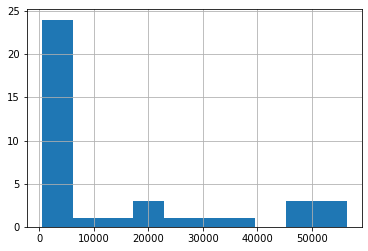

In [326]:
df["income"].hist()

<AxesSubplot:>

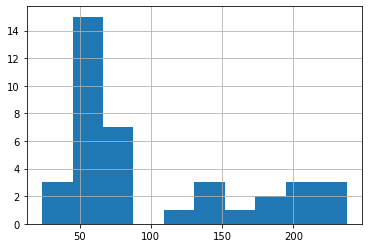

In [327]:
import  numpy as np
np.sqrt(df["income"]).hist()

<AxesSubplot:>

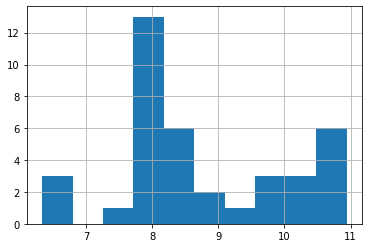

In [328]:
np.log(df["income"]).hist()

C:\Users\USER11\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='total_income', ylabel='Density'>

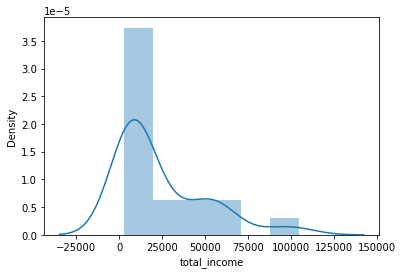

In [329]:
sns.distplot(df['total_income'], hist=True)


<AxesSubplot:>

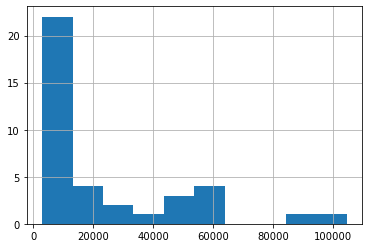

In [330]:
df["total_income"].hist()

In [331]:
df["total_income"]=np.log(df["total_income"])


C:\Users\USER11\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='total_income', ylabel='Density'>

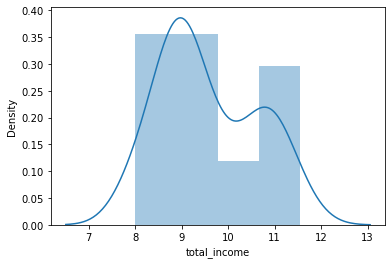

In [332]:
sns.distplot(df['total_income'], hist=True)


In [334]:
X = df.drop(columns=['buy'])
y = df['buy']

In [335]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((30, 13), (30,), (8, 13), (8,))